In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In this cell, we import the essential libraries for our task. We use TensorFlow and Keras for building and training the Convolutional Neural Network (CNN). Additionally, we import NumPy for numerical operations, and libraries from scikit-learn and seaborn for evaluating our model and visualizing results

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()


can_fly = [0, 2]  # airplane, bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # all other classes

train_labels = np.array([1 if label in can_fly else 0 for label in train_labels])
test_labels = np.array([1 if label in can_fly else 0 for label in test_labels])

train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In this cell, we load the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 different classes. We then define two categories: 'can fly' and 'cannot fly'. We create binary labels for this classification task and normalize the pixel values of the images to range between 0 and 1 for better model performance.

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Here, we build the architecture of our Convolutional Neural Network (CNN). The model consists of multiple convolutional layers with ReLU activation functions and max pooling layers to reduce the spatial dimensions. After flattening the output, we add a dense layer followed by a final output layer with a sigmoid activation function to perform binary classification.

In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In this cell, we compile our model. We use the Adam optimizer for efficient training, binary cross-entropy as the loss function suitable for binary classification, and accuracy as a metric to evaluate the model's performance during training and testing.

In [5]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 0.4100 - accuracy: 0.8279 - val_loss: 0.3557 - val_accuracy: 0.8584
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.3358 - accuracy: 0.8627 - val_loss: 0.3064 - val_accuracy: 0.8800
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.3022 - accuracy: 0.8780 - val_loss: 0.3044 - val_accuracy: 0.8791
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.2790 - accuracy: 0.8875 - val_loss: 0.3052 - val_accuracy: 0.8785
Epoch 5/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.2599 - accuracy: 0.8958 - val_loss: 0.2948 - val_accuracy: 0.8836
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.2415 - accuracy: 0.9036 - val_loss: 0.2836 - val_accuracy: 0.8840
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.2210 - accuracy: 0.9122 - val_loss: 0.2741 -

We train our model in this cell using the training images and labels. The training process runs for 10 epochs, and the model's performance is validated on the test dataset after each epoch. The training history, including loss and accuracy over epochs, is stored for further analysis.

In [6]:
predictions = model.predict(test_images)
predictions = (predictions > 0.5).astype(int)

print("Classification Report:")
print(classification_report(test_labels, predictions))


313/313 [==============================] - 4s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8000
           1       0.76      0.70      0.73      2000

    accuracy                           0.90     10000
   macro avg       0.84      0.82      0.83     10000
weighted avg       0.89      0.90      0.89     10000



In this cell, we evaluate the trained model on the test dataset. We generate predictions and convert them to binary values. We then print a classification report, which includes precision, recall, F1 score, and accuracy for a detailed performance analysis.

Confusion Matrix:


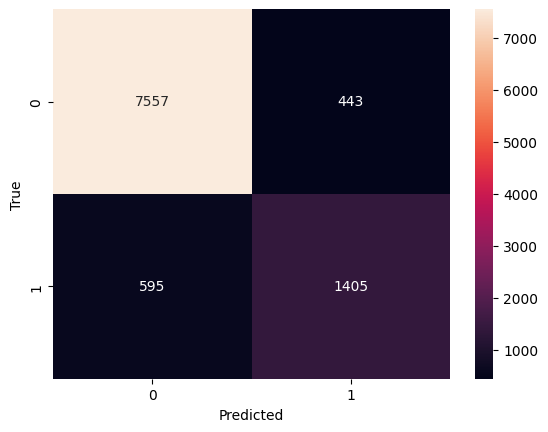

In [7]:
print("Confusion Matrix:")
cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Finally, we create and display a confusion matrix to visualize the performance of our model in distinguishing between the two classes. The confusion matrix helps us understand the true positives, true negatives, false positives, and false negatives in our predictions, providing deeper insights into model performance. We use seaborn to generate a heatmap for better visualization.